In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # for visualization 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table # for creating nice table 
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [41]:
fig = px.histogram(df, x="charges")
fig.show()

In [42]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

sex
smoker
region


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 4 numerical variables
['age', 'bmi', 'children', 'charges']


In [45]:
# the discrete variables
numerical_discrete = []

for var in numerical:
    if len(df[var].unique())<20 :
        print(var, ' values: ', df[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


In [46]:
numerical_continous = [var for var in numerical if var not in numerical_discrete ]
print('There are {} numerical and continuous variables'.format(len(numerical_continous)))

There are 3 numerical and continuous variables


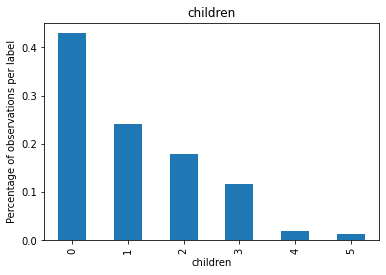

In [47]:
# Visualize  in discrete variables
for var in numerical_discrete:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

In [48]:
#missing value 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This is a regression predictive modelling problem

QUESTION 3

<AxesSubplot:ylabel='Frequency'>

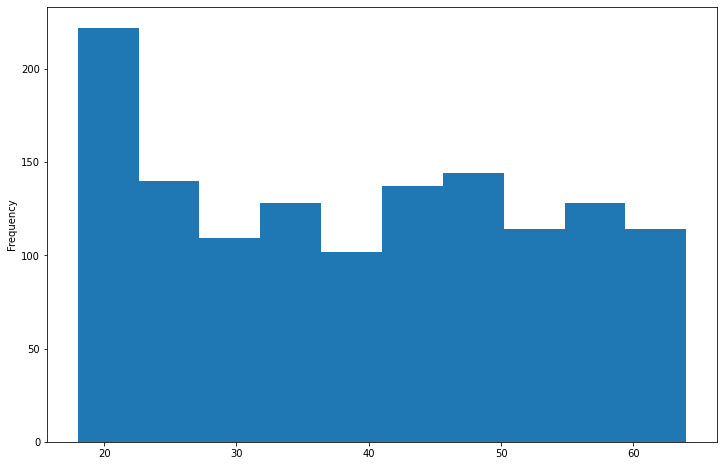

In [49]:
df.age.plot(x=df.index, kind='hist', stacked=False, figsize = (12, 8))

Majority of the age group are thoseless than 20 years. In general, age is approximatly uniformly distributed with a=20 and

QUESTION 4

In [50]:
print(numerical_discrete)
print(numerical_continous)

['children']
['age', 'bmi', 'charges']


In [ ]:
QUESTION 5 and QUESTION 6

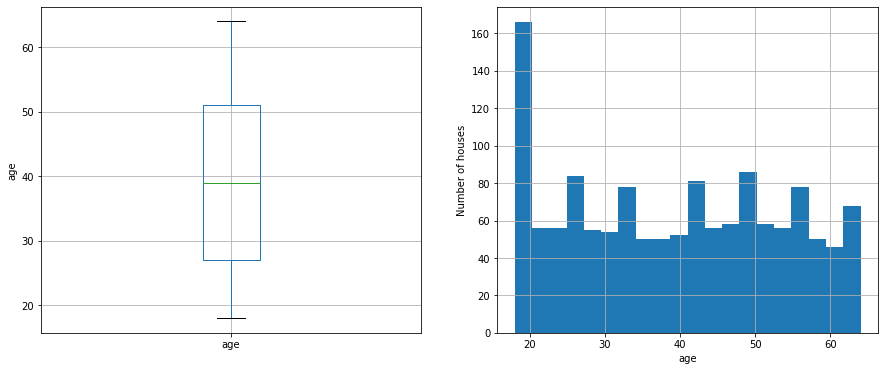

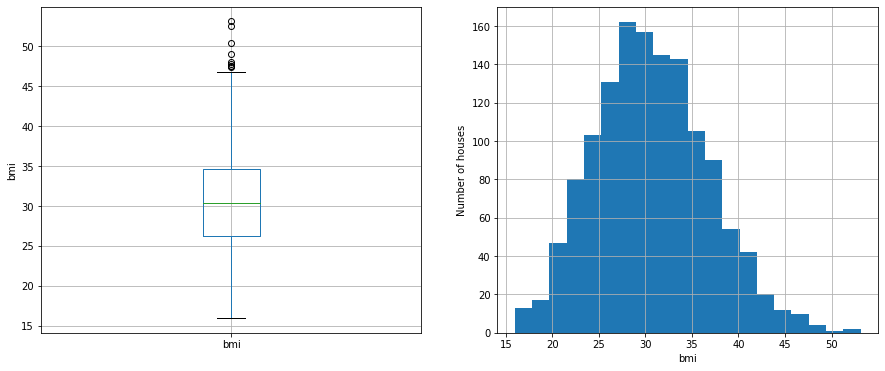

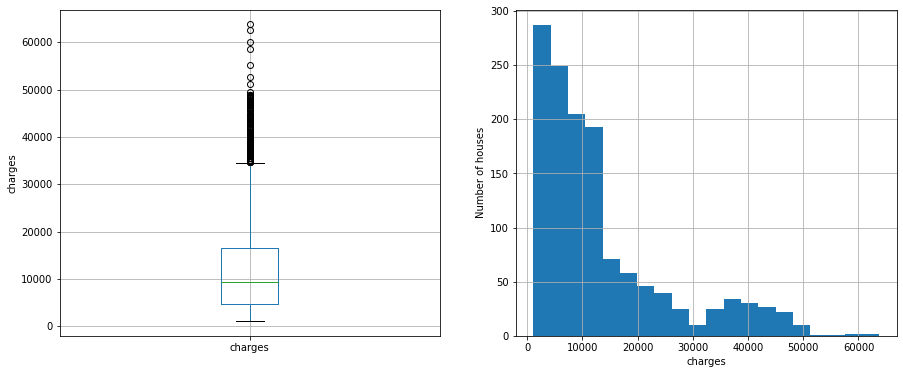

In [51]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical_continous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [52]:
numerical_continous

['age', 'bmi', 'charges']

In [53]:
from scipy import stats
df[['age1', 'bmi1', 'charges1']]=np.abs(stats.zscore(df[numerical_continous]))
print(df[['age1', 'bmi1', 'charges1']])

          age1      bmi1  charges1
0     1.438764  0.453320  0.298584
1     1.509965  0.509621  0.953689
2     0.797954  0.383307  0.728675
3     0.441948  1.305531  0.719843
4     0.513149  0.292556  0.776802
...        ...       ...       ...
1333  0.768473  0.050297  0.220551
1334  1.509965  0.206139  0.914002
1335  1.509965  1.014878  0.961596
1336  1.296362  0.797813  0.930362
1337  1.551686  0.261388  1.311053

[1338 rows x 3 columns]


In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age1,bmi1,charges1
0,19,female,27.900,0,yes,southwest,16884.92400,1.438764,0.453320,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,1.509965,0.509621,0.953689
2,28,male,33.000,3,no,southeast,4449.46200,0.797954,0.383307,0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.441948,1.305531,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,0.513149,0.292556,0.776802


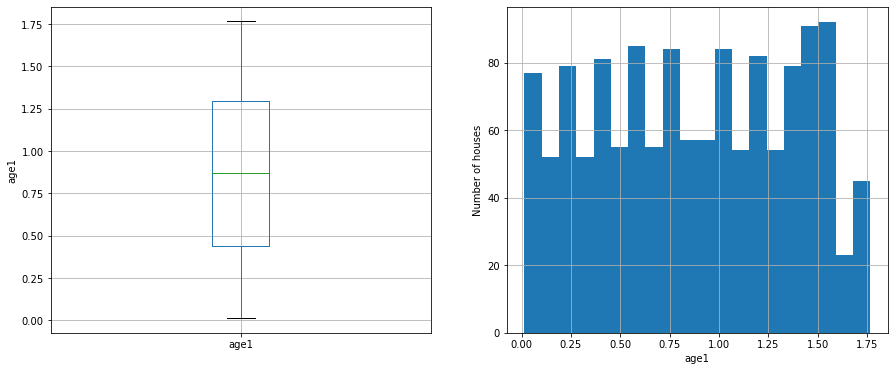

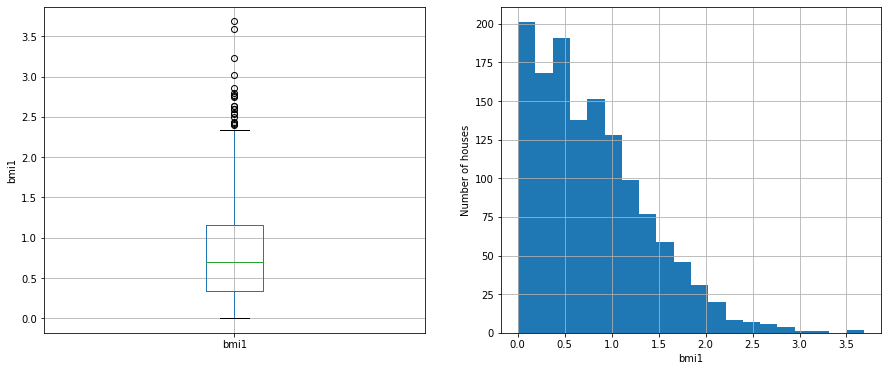

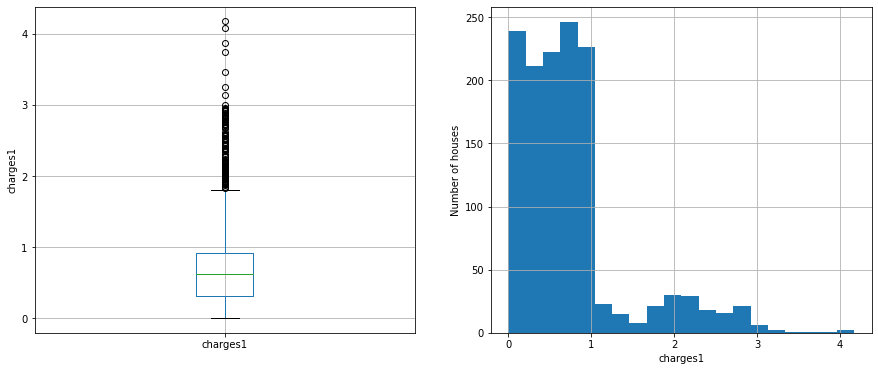

In [55]:
for var in ['age1', 'bmi1', 'charges1']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [56]:
df1=df[(df["bmi1"]< 2.5)]


In [57]:
df1=df1[(df1["charges1"]< 1.6)]


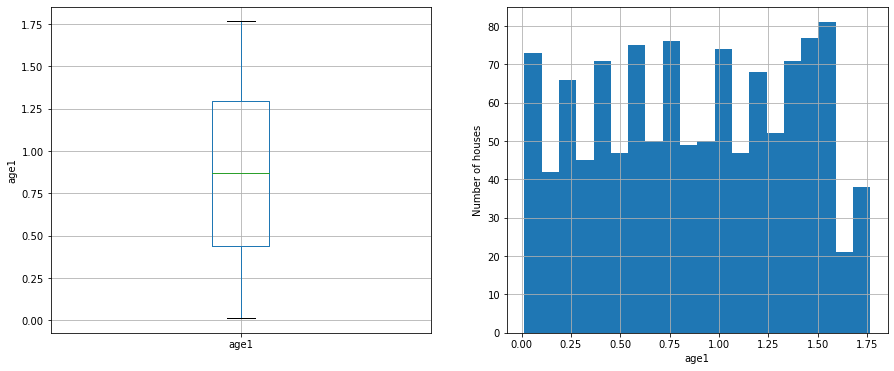

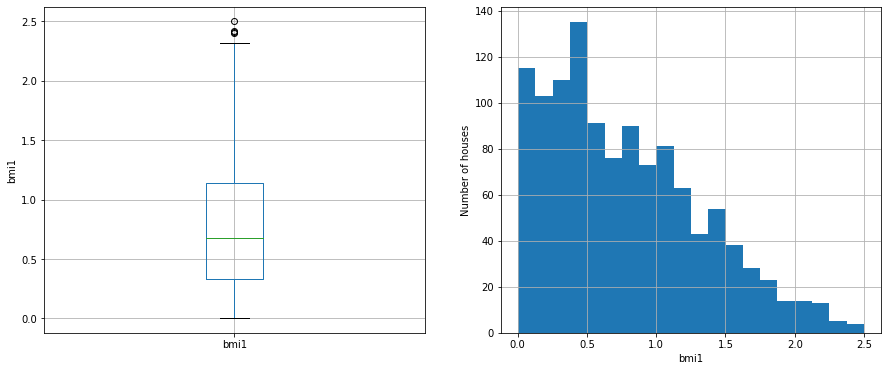

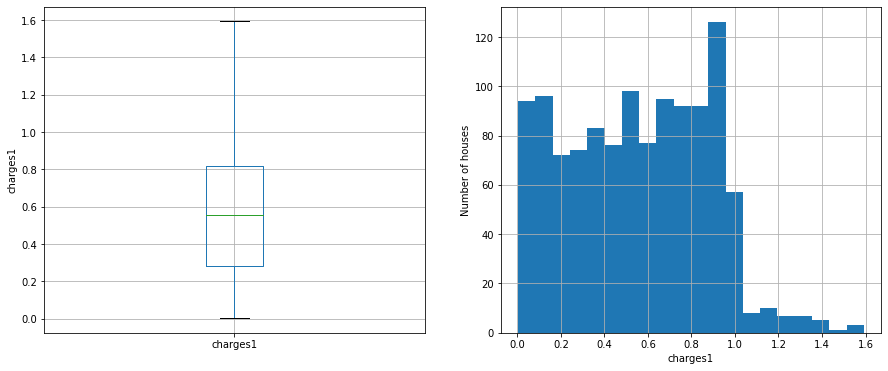

In [58]:
for var in ['age1', 'bmi1', 'charges1']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df1.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df1[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1173 non-null   int64  
 1   sex       1173 non-null   object 
 2   bmi       1173 non-null   float64
 3   children  1173 non-null   int64  
 4   smoker    1173 non-null   object 
 5   region    1173 non-null   object 
 6   charges   1173 non-null   float64
 7   age1      1173 non-null   float64
 8   bmi1      1173 non-null   float64
 9   charges1  1173 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 100.8+ KB


QUESTION 7

In [60]:
# find categorical variables
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 3 categorical variables
['sex', 'smoker', 'region']


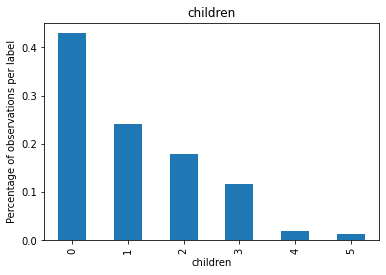

In [61]:
# outlies in discrete variables
for var in numerical_discrete:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

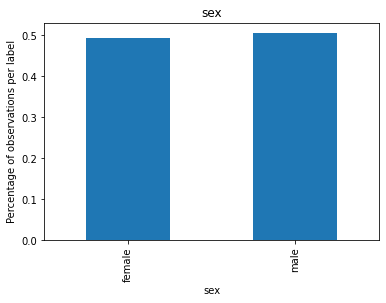

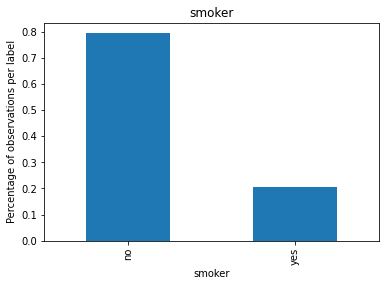

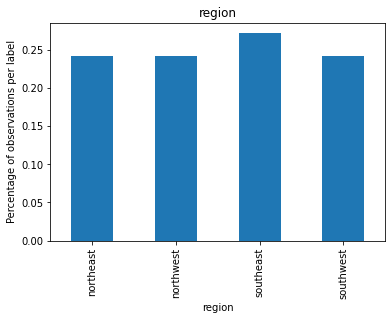

In [62]:
# outlies in categorical variables
for var in categorical:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

In [25]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

QUESTION 9

In [132]:
df

,age,sex,bmi,children,smoker,region,charges,age1,bmi1,charges1
0,19,1,27.900,0,2,4,16884.92400,1.438764,0.453320,0.298584
1,18,2,33.770,1,1,3,1725.55230,1.509965,0.509621,0.953689
2,28,2,33.000,3,1,3,4449.46200,0.797954,0.383307,0.728675
3,33,2,22.705,0,1,2,21984.47061,0.441948,1.305531,0.719843
4,32,2,28.880,0,1,2,3866.85520,0.513149,0.292556,0.776802
...,...,...,...,...,...,...,...,...,...,...
1333,50,2,30.970,3,1,2,10600.54830,0.768473,0.050297,0.220551
1334,18,1,31.920,0,1,1,2205.98080,1.509965,0.206139,0.914002
1335,18,1,36.850,0,1,3,1629.83350,1.509965,1.014878,0.961596
1336,21,1,25.800,0,1,4,2007.94500,1.296362,0.797813,0.930362


QUESTION 10

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   age1      1338 non-null   float64
 8   bmi1      1338 non-null   float64
 9   charges1  1338 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 104.7+ KB


In [71]:
# Turn categorical variables into numbers and fill missing
for label, content in df1.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df1[label] = pd.Categorical(content).codes+1

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1173 non-null   int64  
 1   sex       1173 non-null   int8   
 2   bmi       1173 non-null   float64
 3   children  1173 non-null   int64  
 4   smoker    1173 non-null   int8   
 5   region    1173 non-null   int8   
 6   charges   1173 non-null   float64
 7   age1      1173 non-null   float64
 8   bmi1      1173 non-null   float64
 9   charges1  1173 non-null   float64
dtypes: float64(5), int64(2), int8(3)
memory usage: 76.7 KB


In [74]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'age1',
       'bmi1', 'charges1'],
      dtype='object')

In [80]:
X=df1[['age1', 'sex', 'bmi1', 'children', 'smoker', 'region']]
Y=df1[['charges1']]
print(X.head())
print(Y.head())

       age1  sex      bmi1  children  smoker  region
0  1.438764    1  0.453320         0       2       4
1  1.509965    2  0.509621         1       1       3
2  0.797954    2  0.383307         3       1       3
3  0.441948    2  1.305531         0       1       2
4  0.513149    2  0.292556         0       1       2
   charges1
0  0.298584
1  0.953689
2  0.728675
3  0.719843
4  0.776802


In [82]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X, Y)

Wall time: 1.34 s


<timed exec>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_jobs=-1, random_state=42)

In [83]:
# Score the model on the training set 
model.score(X, Y)

0.9170771465378819

In [84]:
df1.shape

(1173, 10)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label] = pd.Categorical(content).codes+1

FILTER METHOD


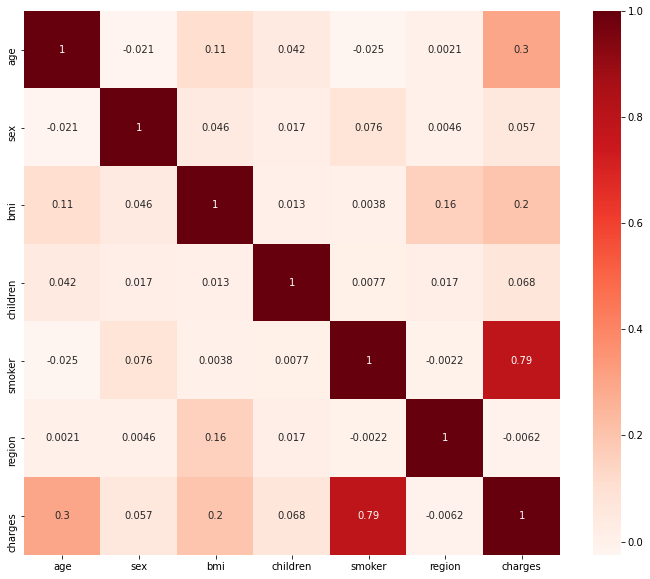

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
cor_target = abs(cor["charges"])
cor_target 

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64

USING BACKWARD ELIMINATION 

In [8]:
import statsmodels.api as sm

X= df.drop("charges",1)   #Feature Matrix
Y = df["charges"]  
#Adding constant column of ones, mandatory for sm.OLS model
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['age', 'bmi', 'children', 'smoker', 'region']


Sex is eliminated from the features 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True]
[1 2 1 1 1 1]


C:\Users\jongala\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



In [10]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

Sex is eliminated from the features 

In [11]:
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 50.836779
Best score using built-in LassoCV: 0.750572


Text(0.5, 1.0, 'Feature importance using Lasso Model')

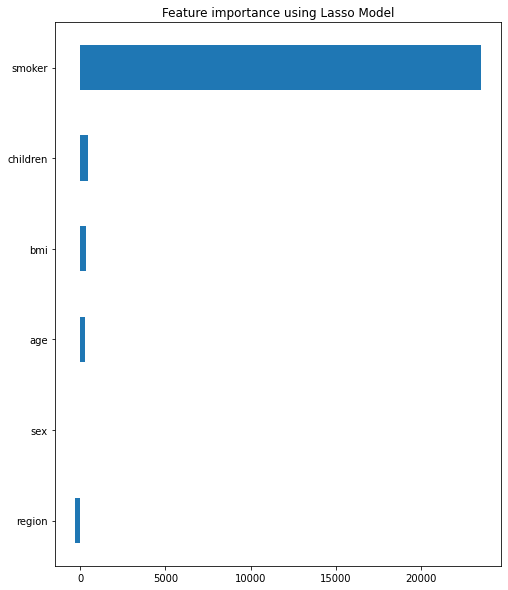

In [12]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [124]:
df= df.drop("sex",1)   #Feature Matrix
X= df.drop("charges",1)   #Feature Matrix
Y = df["charges"]  

In [13]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       2       4
1      18    2  33.770         1       1       3
2      28    2  33.000         3       1       3
3      33    2  22.705         0       1       2
4      32    2  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    2  30.970         3       1       2
1334   18    1  31.920         0       1       1
1335   18    1  36.850         0       1       3
1336   21    1  25.800         0       1       4
1337   61    1  29.070         0       2       2

[1338 rows x 6 columns]


In [14]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


ASSIGNMENT 8

QUESTION 1

In [15]:
Log_Y=pd.Series(np.log10(Y), name='Log_Y') 
Y==pd.Series(df["charges"] , name='Y') 
print(pd.concat([Y,Log_Y], axis=1))


          charges     Log_Y
0     16884.92400  4.227499
1      1725.55230  3.236928
2      4449.46200  3.648308
3     21984.47061  4.342116
4      3866.85520  3.587358
...           ...       ...
1333  10600.54830  4.025328
1334   2205.98080  3.343602
1335   1629.83350  3.212143
1336   2007.94500  3.302752
1337  29141.36030  4.464510

[1338 rows x 2 columns]


Log transformation is usefull in 
1. convert a skewed distribution to a normal distribution/less-skewed distribution are required in regression 
2. Scalling the data 

QUESTION 2

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Log_Y, test_size=0.33, random_state=4)

print(x_train, x_test, y_train, y_test)

      age  sex     bmi  children  smoker  region
997    63    1  36.850         0       1       3
1071   63    2  31.445         0       1       1
732    24    1  30.100         3       1       4
175    63    1  37.700         0       2       4
299    48    1  28.880         1       1       2
...   ...  ...     ...       ...     ...     ...
360    48    1  32.300         2       1       1
709    36    1  27.740         0       1       1
439    26    2  29.450         0       1       1
174    24    1  33.345         0       1       2
1146   60    2  32.800         0       2       4

[896 rows x 6 columns]      age  sex     bmi  children  smoker  region
726   41    2  28.405         1       1       2
260   58    1  25.200         0       1       4
902   26    2  27.265         3       1       1
566   38    1  40.565         1       1       2
776   40    2  32.300         2       1       2
..   ...  ...     ...       ...     ...     ...
349   19    2  27.835         0       1       2
650 

In [41]:
cols=x_train.columns
from sklearn import preprocessing
import pandas as pd
x_train_norm = preprocessing.normalize(x_train, axis=0)
x_train = pd.DataFrame(x_train_norm, columns=cols)
x_train.head()


,age,sex,bmi,children,smoker,region
0,0.050288,0.021214,0.039304,0.000000,0.026307,0.036550
1,0.050288,0.042429,0.033539,0.000000,0.026307,0.012183
2,0.019157,0.021214,0.032105,0.061378,0.026307,0.048733
3,0.050288,0.021214,0.040211,0.000000,0.052613,0.048733
4,0.038315,0.021214,0.030803,0.020459,0.026307,0.024367


In [46]:
cols=x_train.columns
from sklearn import preprocessing
import pandas as pd
x_test_norm = preprocessing.normalize(x_test, axis=0)
x_test = pd.DataFrame(x_test_norm, columns=cols)
x_test.head()

,age,sex,bmi,children,smoker,region
0,0.047304,0.059131,0.043380,0.029386,0.037398,0.034488
1,0.066917,0.029566,0.038486,0.000000,0.037398,0.068976
2,0.029997,0.059131,0.041639,0.088159,0.037398,0.017244
3,0.043842,0.029566,0.061951,0.029386,0.037398,0.034488
4,0.046150,0.059131,0.049329,0.058773,0.037398,0.034488


QUESTION 3


In [49]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores
    # Change max_samples value



RandomForestRegressor(min_samples_leaf=10000, n_jobs=-1, random_state=42)

USING RANDOMFORESTREGRESSOR

In [ ]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              min_samples_leaf=10000)
model.fit(x_train, y_train)
show_scores(model)

{'Training MAE': 0.323736756810316,
 'Valid MAE': 0.3187551665219902,
 'Training RMSLE': 0.08189799256117039,
 'Valid RMSLE': 0.08081173942772446,
 'Training R^2': -3.650286628520405e-08,
 'Valid R^2': -0.001345339141744395}

In [24]:
%%time
from sklearn.ensemble import RandomForestRegressor

Wall time: 21.9 ms


In [51]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=2,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Wall time: 2.06 s


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [52]:
#Best Model Hyper parameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_features': 'auto',
 'max_depth': 5}

In [53]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=17,
                                    min_samples_split=2,
                                    max_features='auto',
                                    max_depth= 5,
                                    n_jobs=-1,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(x_train, y_train)

Wall time: 78.1 ms


RandomForestRegressor(max_depth=5, min_samples_leaf=17, n_estimators=60,
                      n_jobs=-1, random_state=42)

In [54]:
show_scores(ideal_model)

{'Training MAE': 0.07839545300641348,
 'Valid MAE': 0.23407478600016585,
 'Training RMSLE': 0.02941511033026634,
 'Valid RMSLE': 0.05470774854198976,
 'Training R^2': 0.8687546151758813,
 'Valid R^2': 0.5401515238215271}

USING SDGRegressor


In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 

In [76]:
sgdr = SGDRegressor(alpha=0.0001, l1_ratio=0.15,verbose=0, epsilon=0.1,eta0=0.01, power_t=0.25)


print(sgdr)

SGDRegressor(alpha=0.01)


In [77]:
model_sgdr=sgdr.fit(x_train, y_train)
show_scores(model_sgdr)




{'Training MAE': 0.32199672080599473,
 'Valid MAE': 0.3167252125347365,
 'Training RMSLE': 0.08141959128246996,
 'Valid RMSLE': 0.08042921325440248,
 'Training R^2': 0.011935315061791019,
 'Valid R^2': 0.01030021817494442}

In [88]:
cv_score = cross_val_score(sgdr, X, Y, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  -877044874001.011


In [91]:
y_pred = sgdr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.15405775122180357
RMSE:  0.07702887561090178
